In [9]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('nba_games.csv')


Subset Data to 2010 Season, 2014 Season


In [11]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())


            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

averages 2010

In [12]:
knicks_pts_10 = nba_2010[nba_2010.fran_id == 'Knicks']
nets_pts_10 = nba_2010[nba_2010.fran_id == 'Nets']
knicks_pts_avg = knicks_pts_10.pts.mean()
nets_pts_avg = nets_pts_10.pts.mean() 
diff_means_2010 = knicks_pts_10.pts.mean() - nets_pts_10.pts.mean() 

averages 2014

In [13]:
knicks_pts_14 = nba_2014[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014[nba_2014.fran_id == 'Nets']
knicks_pts_avg14 = knicks_pts_14.pts.mean()
nets_pts_avg14 = nets_pts_14.pts.mean() 
diff_means_2014 = knicks_pts_14.pts.mean() - nets_pts_14.pts.mean() 

histograms, 2010


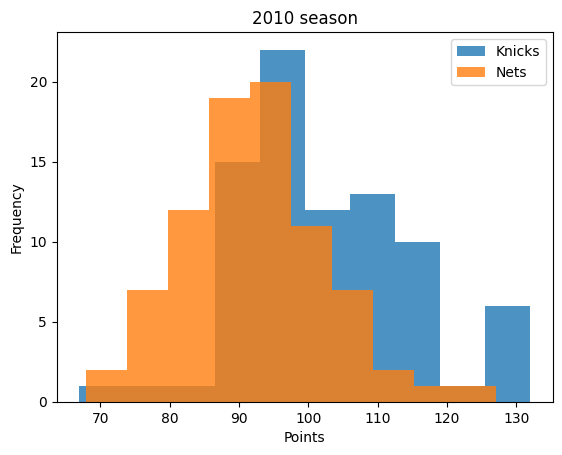

In [14]:
plt.hist(knicks_pts_10.pts, alpha=0.8, label='Knicks')
plt.hist(nets_pts_10.pts, alpha=0.8, label='Nets')
plt.legend()
plt.title('2010 season')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()
plt.close()


histograms, 2014

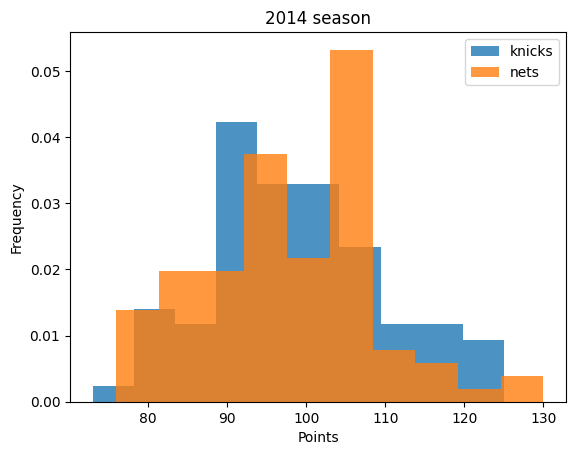

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [15]:
plt.hist(knicks_pts_14.pts, density = True, alpha=0.8, label='knicks')
plt.hist(nets_pts_14.pts, density = True, alpha=0.8, label='nets')
plt.legend()
plt.title('2014 season' )
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()
plt.close

points scored divided by teams

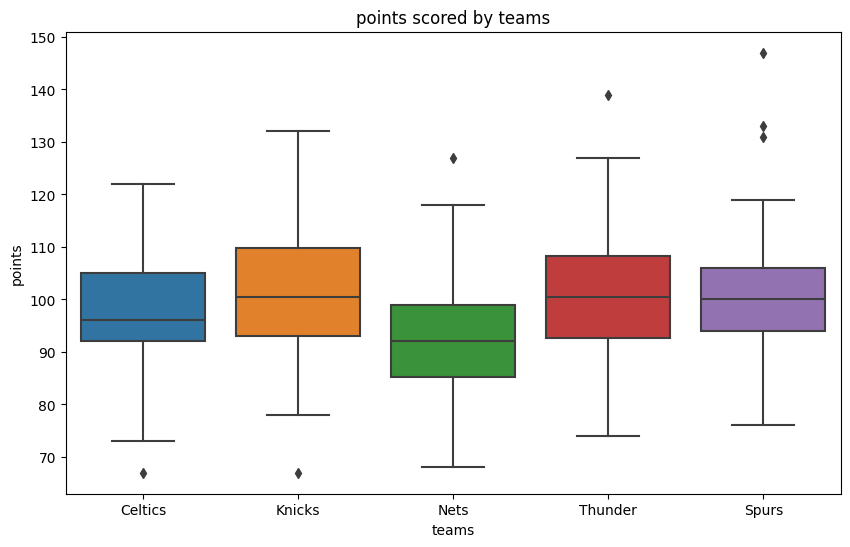

In [16]:

plt.figure(figsize= (10,6))
sns.boxplot(x=nba_2010.fran_id, y=nba_2010.pts, )
plt.xlabel('teams')
plt.ylabel('points')
plt.title('points scored by teams')
plt.show()
plt.close()

do they win more at home or away?

In [17]:

location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_prop = pd.crosstab(nba_2010.game_result, nba_2010.game_location, normalize=True)
print(location_result_freq)
print(location_result_prop)

game_location    A    H
game_result            
L              133  105
W               92  120
game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [18]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2,pval)


[[119. 119.]
 [106. 106.]]
6.501704455367053 0.010777112875193886


Forecast VS Results


In [19]:
print(np.cov(nba_2010.forecast, nba_2010.point_diff))
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr, p)

[[  0.05   1.37]
 [  1.37 186.56]]
0.4402088708468082 9.410391573139846e-23


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


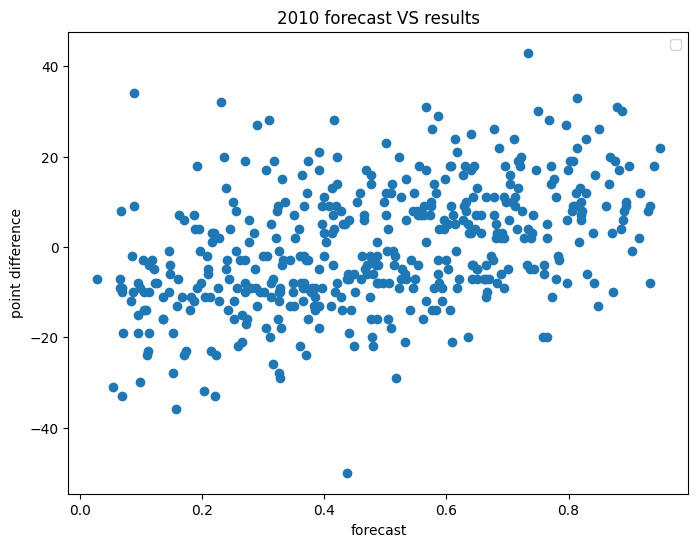

In [20]:
plt.figure(figsize= (8,6))
plt.scatter(nba_2010.forecast, nba_2010.point_diff,)
plt.xlabel('forecast')
plt.ylabel("point difference")
plt.title('2010 forecast VS results')
plt.show()
plt.close()